# TODO:

1. def in altro file
2. parte introduttiva sistemare
3. risultati (nel lavoro di gruppo la scelta era stata abbastanza approssimativa, no criterio)
4. **ripetere tutto solo con Year o solo con NoteDate**

In [2]:
# IMPORTING STATEMENTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mutual_information_regression
import helper_functions_fs

In [3]:
data = pd.read_csv('clean2.csv', index_col=0)
data.head()

,Year,InterestRate,MinorityRatio,CensusTractMedFamIncome,LocalAreaMedianIncome,MonthlyIncome,HUDMedIncome,UPB,LTV,PaymentCount,...,UnitCount,Race1,Minority2,Race2,CensusTractIdentifier,AreaCode,County,State,Minority,Borrower2Dummy
0,2021,2.75,6.379,91316,85144,11771,92300,352000,80.0,360,...,1,6,Missing,6,45.02,38860,5,23,Missing,1
1,2021,2.25,3.553,100396,85144,5651,92300,139872,35.0,180,...,1,5,Missing,8,41.00,38860,5,23,White,0
2,2021,3.00,8.537,87500,91102,9395,95300,208000,80.0,360,...,1,5,Missing,8,7011.00,49340,27,25,White,0
3,2021,3.00,6.052,114531,91102,5912,95300,228000,80.0,360,...,1,5,White,5,7001.00,49340,27,25,White,1
4,2021,3.00,3.583,119423,91102,4420,95300,170000,73.0,360,...,1,5,Missing,8,7061.00,49340,27,25,White,0


In [4]:
len(data)

236349

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236349 entries, 0 to 236762
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Year                     236349 non-null  int64  
 1   InterestRate             236349 non-null  float64
 2   MinorityRatio            236349 non-null  float64
 3   CensusTractMedFamIncome  236349 non-null  int64  
 4   LocalAreaMedianIncome    236349 non-null  int64  
 5   MonthlyIncome            236349 non-null  int64  
 6   HUDMedIncome             236349 non-null  int64  
 7   UPB                      236349 non-null  int64  
 8   LTV                      236349 non-null  float64
 9   PaymentCount             236349 non-null  int64  
 10  Age1                     236349 non-null  int64  
 11  Age2                     236349 non-null  int64  
 12  HousingExpense           236349 non-null  float64
 13  DebtExpense              236349 non-null  float64
 14  PMI      

In [4]:
from sklearn.preprocessing import OrdinalEncoder

In [5]:
enc = OrdinalEncoder()
data[["Bank","Minority", "Minority2"]] = enc.fit_transform(data[["Bank","Minority", "Minority2"]])

In [6]:
data[['Bank','Minority','Minority2']]

,Bank,Minority,Minority2
0,0.0,1.0,1.0
1,0.0,2.0,1.0
2,0.0,2.0,1.0
3,0.0,2.0,2.0
4,0.0,2.0,1.0
...,...,...,...
236758,9.0,2.0,1.0
236759,9.0,2.0,2.0
236760,9.0,2.0,2.0
236761,9.0,2.0,2.0


# Removing columns with low variance (<0.1)
These columns will be removed in any case because they don't have any relevant informational content. 

In [7]:
df = data.replace('Missing', 999)

In [8]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.15))
X_sel = sel.fit_transform(df)
print('The removed features are: '+str(set(data.columns) - set (sel.get_feature_names_out())))

The removed features are: {'PropertyUsage', 'HOEPA', 'UnitCount'}


In [9]:
X_sel = pd.DataFrame(X_sel , columns=sel.get_feature_names_out())
X_sel

,Year,InterestRate,MinorityRatio,CensusTractMedFamIncome,LocalAreaMedianIncome,MonthlyIncome,HUDMedIncome,UPB,LTV,PaymentCount,...,PropertyType,Race1,Minority2,Race2,CensusTractIdentifier,AreaCode,County,State,Minority,Borrower2Dummy
0,2021,2.75,6.379,91316,85144,11771,92300,352000,80.0,360,...,1,6,1.0,6,45.02,38860,5,23,1.0,1
1,2021,2.25,3.553,100396,85144,5651,92300,139872,35.0,180,...,1,5,1.0,8,41.0,38860,5,23,2.0,0
2,2021,3.0,8.537,87500,91102,9395,95300,208000,80.0,360,...,1,5,1.0,8,7011.0,49340,27,25,2.0,0
3,2021,3.0,6.052,114531,91102,5912,95300,228000,80.0,360,...,1,5,2.0,5,7001.0,49340,27,25,2.0,1
4,2021,3.0,3.583,119423,91102,4420,95300,170000,73.0,360,...,1,5,1.0,8,7061.0,49340,27,25,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236344,2019,3.875,17.119,54688,69210,3275,70000,133000,95.0,360,...,1,5,1.0,8,9599.0,35820,111,31,2.0,0
236345,2019,3.5,5.698,85714,69210,11500,70000,295000,84.0,240,...,1,5,2.0,5,9606.0,35820,111,31,2.0,1
236346,2019,3.875,13.887,84821,73964,4298,75200,77250,46.0,360,...,1,5,2.0,5,9512.0,999,13,31,2.0,1
236347,2019,4.625,6.373,73150,69210,6810,70000,207100,95.0,360,...,1,5,2.0,5,9598.0,35820,111,31,2.0,1


In [10]:
#X_sel.to_csv('features.csv')

# Feature selection: the main drivers of interest rates 




In [12]:
X = X_sel.copy()
y = X.pop('InterestRate').astype(float)

# X = X_sel.drop(['InterestRate'], axis='columns')#, 'Age2', 'CreditScore2', 'Gender2', 'Minority2', 'Race2'], axis='columns')

In [11]:
all_labels = list(X.columns)
results = pd.DataFrame(index=all_labels, columns=['MIR_5', 'MIR_10', 'Best_5','Best_10', '10K', 'RFE_5', 'RFE_10'])

## 1. Mutual Information Regression


In [14]:
mi_scores = make_mi_scores(X, y)

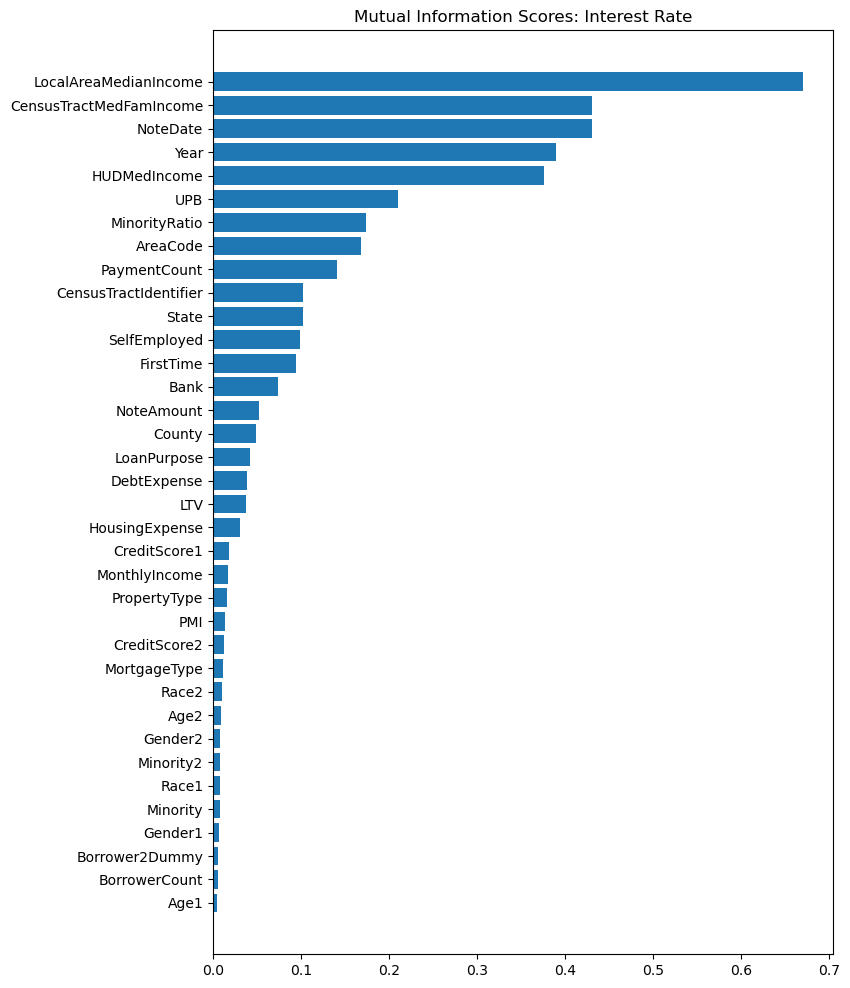

In [15]:
plot_mi_scores(mi_scores)

In [16]:
mi_scores[:10]

LocalAreaMedianIncome      0.670626
CensusTractMedFamIncome    0.431017
NoteDate                   0.430504
Year                       0.389992
HUDMedIncome               0.375569
Name: MI Scores, dtype: float64

In [ ]:
save_selected(features = mi_scores[:5].index, name_model = 'MIR_5')
save_selected(features = mi_scores[:10].index, name_model = 'MIR_10')

## Excluding 2nd borrower

From the results of the Mutual Information regressor, it seems clear that those variables related to the second borrower on a given loan are not extremely correlated with interest rates. 

Therefore, we exclude variables related to the second borrower for 2 main reasons. Firstly, we believe it is unlikely that the additional borrower might have such an important impact of the determination of an individual's credit score. Nonetheless, we will keep the dummy indicationg whether a second borrower is present or not since this might have some impact. Secondly, only 60% of observations have an additional borrower, therefore the informational content is missing for a large part of the observations. 

In [18]:
y = X_sel.InterestRate.astype(float)
X = X.drop(['Age2', 'CreditScore2', 'Gender2', 'Minority2', 'Race2'], axis='columns')

## 2. SelectKBest

Select features according to the k highest scores, using `f_regression` as score function, which uses a linear model for testing the effect of a single regressor, sequentially for many regressors.



#### Rescaling

In [19]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

X_trans = ss.fit_transform(X)
X_trans = pd.DataFrame(X_trans, columns=X.columns)

#### SelectKBest

We identify the 5 and later 10 most relevant features.

In [20]:
# SELECT 5 BEST FROM X_ALL_LABELS
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=5)
selector.fit_transform(X_trans,y)
selected = selector.get_feature_names_out()
print(selected)

['Year' 'PaymentCount' 'NoteDate' 'FirstTime' 'SelfEmployed']


In [21]:
save_selected(features = selected, name_model = 'Best_5')

In [22]:
# SELECT 10 BEST FROM X_ALL_LABELS
selector = SelectKBest(f_regression, k=10)
selector.fit_transform(X_trans,y)
selected = selector.get_feature_names_out()
print(selected)

['Year' 'MinorityRatio' 'LTV' 'PaymentCount' 'DebtExpense' 'CreditScore1'
 'NoteDate' 'FirstTime' 'SelfEmployed' 'PropertyType']


In [23]:
save_selected(features = selected, name_model = 'Best_10')

## 3. Recursive Feature Elimination

We use an external estimator that assigns weights to features which is an SVR with linear kernel, and the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained. Then, the least important features are pruned from current set of features until the desirred number of features is left.



In [26]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [30]:
estimator = RandomForestRegressor(n_estimators=100, max_depth=10)

In [31]:
selector = RFE(estimator, n_features_to_select=5, step=1, verbose=1)

In [32]:
selector = selector.fit(X_trans,y)

Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [37]:
selected = selector.feature_names_in_[selector.support_]
print(selected)

['Year' 'LocalAreaMedianIncome' 'PaymentCount' 'NoteDate' 'SelfEmployed']


In [38]:
save_selected(features = selected, name_model = 'RFE_5')

# REPEAT RFE WITH 10 FEATURES


In [40]:
estimator = RandomForestRegressor(n_estimators=100, max_depth=10)
selector = RFE(estimator, n_features_to_select=10, step=1, verbose=1)
selector = selector.fit(X_trans,y)

Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
['Year' 'LocalAreaMedianIncome' 'HUDMedIncome' 'PaymentCount'
 'CreditScore1' 'NoteDate' 'Bank' 'LoanPurpose' 'FirstTime' 'SelfEmployed']


In [43]:
selected = selector.feature_names_in_[selector.support_]
print(selected)

['Year' 'LocalAreaMedianIncome' 'HUDMedIncome' 'PaymentCount'
 'CreditScore1' 'NoteDate' 'Bank' 'LoanPurpose' 'FirstTime' 'SelfEmployed']


In [41]:
save_selected(features = selected, name_model = 'RFE_10')

# Comparison of selection results


In [52]:
results.style.applymap(format_df_green)

,MutualInfoReg,5K,10K,RFE,RFE_10
Year,1,1,1,1,1
MinorityRatio,0,0,1,0,0
CensusTractMedFamIncome,1,0,0,0,0
LocalAreaMedianIncome,1,0,0,1,1
MonthlyIncome,0,0,0,0,0
HUDMedIncome,1,0,0,0,1
UPB,0,0,0,0,0
LTV,0,0,1,0,0
PaymentCount,0,1,1,1,1
Age1,0,0,0,0,0



# PROBLEM: BOTH YEAR AND NOTEDATE



In [45]:
(data.Year == data.NoteDate).sum()/len(data)

0.9435411192770013

# da questo sito



# RIVEDERE IL SITO, INTERESSANTE PER COME FITTA I MODELLI MA NON è FEATURE SELECTION
https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline_column_transformer.html#using-numerical-and-categorical-variables-together


# TODO:

- cambiare dtype to categorical
- feature selection SOLO CON MUTUAL INFO CLASSIFIER ? 

In [ ]:
# IMPORTING STATEMENTS
import pandas as pd

In [ ]:
data = pd.read_csv('clean.csv', index_col=0)
data.head()

In [ ]:
data.columns

In [ ]:
target = data['CreditScore1'].copy(deep=True)

In [ ]:
X = data.copy(deep=True).drop(['CreditScore1'], axis=1)

In [ ]:
X.info()

In [ ]:
X.Minority.unique()

# Using numerical and categorical variables together

https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline_column_transformer.html

In [ ]:
numerical = list(pd.read_csv('numerical.csv')['0'])
categorical = list(pd.read_csv('categorical.csv')['0'])

In [ ]:
numerical

In [ ]:
categorical

In [ ]:
numerical_columns = data[numerical].astype('float64')
categorical_columns = data[categorical].astype('object')

In [ ]:
pd.testing.assert_index_equal(numerical_columns.index,categorical_columns.index, check_names=False)
data = pd.merge(numerical_columns, categorical_columns, left_index=True, right_index=True)

### Dispatch columns to a specific processor

Ee need to treat data differently depending on their nature (i.e. numerical or categorical).

Scikit-learn provides a `ColumnTransformer` class which will send specific columns to a specific transformer, making it easy to fit a single predictive model on a dataset that combines both kinds of variables together (heterogeneously typed tabular data).

We first define the columns depending on their data type:

- one-hot encoding will be applied to categorical columns. Besides, we use handle_unknown="ignore" to solve the potential issues due to rare categories.

- numerical scaling numerical features which will be standardized.

Now, we create our `ColumnTransfomer` by specifying three values: the preprocessor name, the transformer, and the columns. First, let’s create the preprocessors for the numerical and categorical parts.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

Now, we create the transformer and associate each of these preprocessors with their respective columns.



In [ ]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

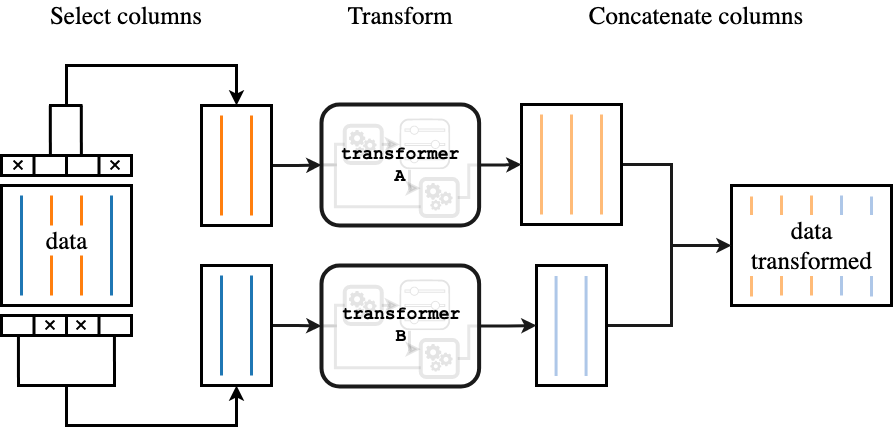

A ColumnTransformer does the following:

It splits the columns of the original dataset based on the column names or indices provided. We will obtain as many subsets as the number of transformers passed into the ColumnTransformer.

It transforms each subsets. A specific transformer is applied to each subset: it will internally call fit_transform or transform. The output of this step is a set of transformed datasets.

It then concatenates the transformed datasets into a single dataset.

The important thing is that ColumnTransformer is like any other scikit-learn transformer. In particular it can be combined with a classifier in a Pipeline:A ColumnTransformer does the following:

It splits the columns of the original dataset based on the column names or indices provided. We will obtain as many subsets as the number of transformers passed into the ColumnTransformer.

It transforms each subsets. A specific transformer is applied to each subset: it will internally call fit_transform or transform. The output of this step is a set of transformed datasets.

It then concatenates the transformed datasets into a single dataset.

The important thing is that ColumnTransformer is like any other scikit-learn transformer. In particular it can be combined with a classifier in a Pipeline:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

The final model is more complex than the previous models but still follows the same API (the same set of methods that can be called by the user):

- the fit method is called to preprocess the data and then train the classifier of the preprocessed data;

- the predict method makes predictions on new data;

- the score method is used to predict on the test data and compare the predictions to the expected test labels to compute the accuracy.

Let’s start by splitting our data into train and test sets.


# WOULD BE BETTER TO USE CROSS VALIDATION !!!!

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

In [ ]:
model.fit(data_train, target_train)
#data_train.info()

# --------------------------- GROUP PROJECT ---------------------------

## Scaling - NO SCALING BC CATEGORICAL ? 

In [ ]:
results = pd.DataFrame(index=X.columns, columns=['5K_all', '10K_all','5K_avgs',
                                                 'pvalue5_all', 'pvalue5_avgs', 'pvalue1_all', 'pvalue1_avgs'])

In [ ]:
# SELECT 5 BEST FROM X_ALL_LABELS

selector = SelectKBest(k=5)
selector.fit_transform(X,y)
selected = selector.get_feature_names_out(input_features=all_labels)

for var in all_labels:
    if var in selected:
        results.loc[var, '5K_all']=1
    else:
        results.loc[var, '5K_all']=0

In [ ]:
# SELECT 10 BEST FROM X_ALL_LABELS

selector = SelectKBest(k=10)
selector.fit_transform(X_all_labels,y)
selected = selector.get_feature_names_out(input_features=all_labels)

for var in all_labels:
    if var in selected:
        results.loc[var, '10K_all']=1
    else:
        results.loc[var, '10K_all']=0

In [ ]:
# SELECT 5 BEST FROM X_ONLY_AVG

selector = SelectKBest(k=5)
selector.fit_transform(X_only_avgs,y)
selected = selector.get_feature_names_out(input_features=only_avgs)

for var in all_labels:
    if var not in only_avgs:
        results.loc[var, '5K_avgs']=2
    elif var in selected:
        results.loc[var, '5K_avgs']=1
    else:
        results.loc[var, '5K_avgs']=0

# SELECT 10 BEST FROM X_ONLY_AVG

selector = SelectKBest(k=10)
selector.fit_transform(X_only_avgs,y)
selected = selector.get_feature_names_out(input_features=only_avgs)

for var in all_labels:
    if var not in only_avgs:
        results.loc[var, '10K_avgs']=2
    elif var in selected:
        results.loc[var, '10K_avgs']=1
    else:
        results.loc[var, '10K_avgs']=0

In [ ]:
from sklearn.feature_selection import SelectFpr

#chi2 requires only positive inputs so it's a no

### SelectPFR

In [ ]:
# 0.005 p-value on ALL_LABELS
selector = SelectFpr(alpha=0.005)
X_new = selector.fit_transform(X_all_labels,y)
selected = selector.get_feature_names_out(input_features= all_labels)

for var in all_labels:
    if var in selected:
        results.loc[var, 'pvalue5_all']=1
    else:
        results.loc[var, 'pvalue5_all']=0

In [ ]:
# 0.001 p-value on ALL_LABELS
selector = SelectFpr(alpha=0.001)
X_new = selector.fit_transform(X_all_labels,y)
selected = selector.get_feature_names_out(input_features= all_labels)

for var in all_labels:
    if var in selected:
        results.loc[var, 'pvalue1_all']=1
    else:
        results.loc[var, 'pvalue1_all']=0

In [ ]:
# 0.005 p-value on ONLY_AVG
selector = SelectFpr(alpha=0.005)
X_new = selector.fit_transform(X_only_avgs,y)
selected = selector.get_feature_names_out(input_features=only_avgs)

for var in all_labels:
    if var not in only_avgs:
        results.loc[var, 'pvalue5_avgs']=2
    elif var in selected:
        results.loc[var, 'pvalue5_avgs']=1
    else:
        results.loc[var, 'pvalue5_avgs']=0

In [ ]:
# 0.001 p-value on ONLY_AVG
selector = SelectFpr(alpha=0.001)
X_new = selector.fit_transform(X_only_avgs,y)
selected = selector.get_feature_names_out(input_features=only_avgs)

for var in all_labels:
    if var not in only_avgs:
        results.loc[var, 'pvalue1_avgs']=2
    elif var in selected:
        results.loc[var, 'pvalue1_avgs']=1
    else:
        results.loc[var, 'pvalue1_avgs']=0

In [ ]:
def is_true(s):
    if s == 1:
        color = 'lightgreen'
    elif s == 0:
        color = 'red'
    else:
        color = 'white'
    
    return 'background-color: %s' % color 

results.style.applymap(is_true)

In [ ]:
results.style.applymap(is_true)

#### Summary of the results:
- BILL_AMT's are not chosen from any selector. Most of them are not even significant, except for 1 which is significant at 0.001. BILL_AVG is never selected and is not even significant
- PAY_AMT1 is not chosed among the first 5, but only among the first 10. the Other pay_amt's are almost never chosen, even if they are significant at 0.001. Pay_avg summarizes all the Pay_amt's and is selected among the first 10, even in the first 5 when considering only averages. it is also significant at 0.001 so maybe we can use it instead of pay_amt1 to summarize all of them.
- PAY's are almost always selected among the best 5 and are also significant at 0.001. the average is selected among the first 5 and is significant at 0.001. 
- AGE is never selected and also not significant
- MARRIAGE is never selected but is significant
- EDUCATION and SEX are selected when considering only averages.they are significant at 0.001
- LIMIT_BAL is selected among the first 5 and is significant at 0.001

We can choose:
- BILL_AVG
- PAY_AVG as a summary of pay_amt's
- all 6 PAY's (but not their average(?))
- LIMIT_BAL
- EDUCSTTION and SEX
 
